### Neural Network

Here is an implementation of neural network from scratch in python. This is expandable to as many layers the user wants. It has forward propagation and back propagation. The update takes place exactly to concept what sir has taught in class. Back propagation involves derivatives of front layers and more about derivation can be seen in the below images. Below images are only representation and experimentation over how propagation works mathematically.

Below is the neural network example to notice how it works and how forward propagation is done and how derivatives are calculated.

##### For code refer to middle of this notebook

#### Basic 2 Hidden Layer neural network design Example to understand ...

<img src="NN1.jpeg" alt="drawing" width="50%"/>

### Forward Propagation Mathematics ...


<img src="NN2.jpeg" alt="drawing" width="50%"/>

### Error and Backward Propagation Mathematics ...

##### Output Layer derivative

<img src="NN3.jpeg" alt="drawing" width="50%"/>

##### Hidden layer 2 derivative Mathematics ...

<img src="NN4.jpeg" alt="drawing" width="50%"/>

##### Hidden layer 1 derivative Mathematics ...

<img src="NN5.jpeg" alt="drawing" width="50%"/>

# The above are just mathematics how things in Neural Network work and below is the implementation of scalable Neural Network in python from scratch

### Importing Libraries ...

In [153]:
from math import exp
from random import seed
from random import random
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

### Initialization of Neural Network ...
Every layer nodes weights will initialized with some random weights

* Number of layers to be present
* Number of nodes per each layer

The above two factors are taken from user

In [7]:
def initNetwork(inputs,n_layers,layer_nodes,outputs):
    
    network = []
    # n_layers will contain how many layers need to be taken
    # Layer nodes will take the number of nodes that will be present in that
    for layer in range(n_layers):
        if layer == 0:
            network.append({'W':np.array([[random() for i in range(inputs)] for j in range(layer_nodes[layer])])})
        else:
            network.append({'W':np.array([[random() for i in range(layer_nodes[layer-1])] for j in range(layer_nodes[layer])])})
    network.append({'W':np.array([[random() for i in range(layer_nodes[-1])] for j in range(outputs)])})    
    return network

### Forward Propagation ...
Here the input value will be forwarded in the neural network and each node will have sigmoid function as activation function

In [122]:
# Sigmoid Function
def sigmoid(val):
    return 1/(1+exp(-val))

# Relu Function
def relu(val):
    if val>0:
        return val
    return 0

# Forward Propagation
def forward_propagate(network,row):
    x = np.array(row)
    l = 1
    for layer in network:
        outputs = []
        # We now have the layer that we want
        # now multiply it with Wtx
        for node in layer['W']:
            dot_product = np.dot(node,x.T)
            outputs.append(sigmoid(dot_product))
        l+=1
        x = np.array(outputs)
        layer['outputs'] = outputs
    return x

### Backward Propagation ...
As discussed above in the images we will follow same kind of derivative methodology and we will make this back propagation work

In [139]:
# Sigmoid Derivative
def sigmoid_derivative(val):
    return val*(1.0-val)

# Back propagation Helper which basically calculates the required derivatives for a given weight
def backPropagateHelper(network,layer_index,node_index):
    updation_sum = 0
    layer = network[layer_index]
    if layer_index == len(network)-1:
        for i in range(len(layer['W'])):
            updation_sum+= (layer['W'][i][node_index])*sigmoid_derivative(layer['outputs'][i])*(2*layer['error'][i])
    else:
        for i in range(len(layer['W'])):
            updation_sum+= (-layer['W'][i][node_index])*sigmoid_derivative(layer['outputs'][i])*backPropagateHelper(network,layer_index+1,i)
    return updation_sum

# Back propagation which will calculate the derivative of each weight for each node of each layer
def backwardPropagation(network,inputs):
    for i in range(len(network)):
        arr = np.zeros((len(network[i]['W']),len(network[i]['W'][0])))
        for j in range(len(network[i]['W'])):
            for k in range(len(network[i]['W'][0])):
                if i == 0:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-inputs[k])*backPropagateHelper(network,i+1,j)
                elif i != len(network)-1:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-network[i-1]['outputs'][k])*backPropagateHelper(network,i+1,j)
                else:
                    arr[j][k] = sigmoid_derivative(network[i]['outputs'][j])*(-network[i-1]['outputs'][k])*(2*(network[i]['error'][j]))
        network[i]['D'] = arr
        
# This function returns error derivative for our final output layer       
def error (network,y):
    layer = network[-1]
    temp = []
    for i in range(len(layer['outputs'])):
        temp.append(y[i] - layer['outputs'][i])
    network[-1]['error'] = np.array(temp)
    return network

### Weight Updation ...

In [144]:
def weight_updation(network,alpha):
    for i in range(len(network)):
        network[i]['W'] = network[i]['W'] - alpha*network[i]['D']

### Main Code ...

In [155]:
# Modify the values if required it is scalable!!!!!
epochs = 10000
X = [1,2,3,4,5]# Train dataset
y = [0,1]# Target output
input_layer_size = len(X)
output_layer_size = len(y)
alpha = 0.1# Learning rate
hidden_layers = 2# Number of Hidden Layers
nodes_in_each_hidden_layer = [2,2] # Hidden layer number of nodes as list
network = initNetwork(input_layer_size,hidden_layers,nodes_in_each_hidden_layer,output_layer_size)
print("Neural Network looks like this ")
for i in range(len(network)):
    print("Layer ",i+1)
    print(network[i])

Neural Network looks like this 
Layer  1
{'W': array([[0.24970553, 0.54029993, 0.72357415, 0.77548679, 0.85424415],
       [0.49629086, 0.49401216, 0.04366417, 0.76932181, 0.49864275]])}
Layer  2
{'W': array([[0.38005366, 0.60184518],
       [0.54194646, 0.35181665]])}
Layer  3
{'W': array([[0.54019573, 0.82758778],
       [0.75256189, 0.70223107]])}


### Running ...

In [156]:
epoch = 0
loss = []
while epoch< epochs:
    y_pred = forward_propagate(network,X) 
    E = mean_squared_error(y,y_pred)
    loss.append(E)
    error(network,y)
    backwardPropagation(network,X)
    weight_updation(network,alpha)
    print("Epoch ",epoch+1," Loss ",E)
    print("Predicted Values ",y_pred)
    epoch += 1

Epoch  1  Loss  0.298184360005106
Predicted Values  [0.72714761 0.73995178]
Epoch  2  Loss  0.29321932953279084
Predicted Values  [0.72089754 0.7416487 ]
Epoch  3  Loss  0.28824264001799166
Predicted Values  [0.71456283 0.74331878]
Epoch  4  Loss  0.28325846846958985
Predicted Values  [0.7081479  0.74496374]
Epoch  5  Loss  0.27827108972534886
Predicted Values  [0.70165742 0.74658523]
Epoch  6  Loss  0.27328484990142937
Predicted Values  [0.69509628 0.74818486]
Epoch  7  Loss  0.268304139669871
Predicted Values  [0.68846954 0.74976417]
Epoch  8  Loss  0.26333336770949095
Predicted Values  [0.68178244 0.75132462]
Epoch  9  Loss  0.2583769346639185
Predicted Values  [0.67504034 0.75286763]
Epoch  10  Loss  0.25343920792036173
Predicted Values  [0.66824872 0.75439451]
Epoch  11  Loss  0.24852449749522046
Predicted Values  [0.66141316 0.75590652]
Epoch  12  Loss  0.2436370332791034
Predicted Values  [0.65453927 0.75740483]
Epoch  13  Loss  0.23878094385567944
Predicted Values  [0.64763271 

Epoch  130  Loss  0.026386327974828473
Predicted Values  [0.19228288 0.87430215]
Epoch  131  Loss  0.02607940726123941
Predicted Values  [0.19101398 0.87481025]
Epoch  132  Loss  0.02577851920646899
Predicted Values  [0.18976366 0.87531322]
Epoch  133  Loss  0.025483505511871028
Predicted Values  [0.18853155 0.87581116]
Epoch  134  Loss  0.025194212870273
Predicted Values  [0.18731727 0.87630413]
Epoch  135  Loss  0.024910492789339198
Predicted Values  [0.18612046 0.8767922 ]
Epoch  136  Loss  0.024632201421527274
Predicted Values  [0.18494077 0.87727545]
Epoch  137  Loss  0.024359199400400086
Predicted Values  [0.18377785 0.87775394]
Epoch  138  Loss  0.02409135168306184
Predicted Values  [0.18263138 0.87822774]
Epoch  139  Loss  0.02382852739849365
Predicted Values  [0.18150101 0.87869691]
Epoch  140  Loss  0.02357059970157073
Predicted Values  [0.18038643 0.87916153]
Epoch  141  Loss  0.0233174456325496
Predicted Values  [0.17928733 0.87962166]
Epoch  142  Loss  0.023068945981820792

Predicted Values  [0.10179224 0.9182979 ]
Epoch  284  Loss  0.008477439842289172
Predicted Values  [0.10151987 0.91846108]
Epoch  285  Loss  0.008436796008909226
Predicted Values  [0.10124939 0.91862338]
Epoch  286  Loss  0.00839651037074027
Predicted Values  [0.10098075 0.9187848 ]
Epoch  287  Loss  0.00835657841066953
Predicted Values  [0.10071395 0.91894534]
Epoch  288  Loss  0.008316995684998588
Predicted Values  [0.10044896 0.91910502]
Epoch  289  Loss  0.008277757821992695
Predicted Values  [0.10018577 0.91926384]
Epoch  290  Loss  0.008238860520464074
Predicted Values  [0.09992436 0.91942182]
Epoch  291  Loss  0.008200299548387566
Predicted Values  [0.0996647  0.91957894]
Epoch  292  Loss  0.008162070741548328
Predicted Values  [0.09940679 0.91973523]
Epoch  293  Loss  0.008124170002220248
Predicted Values  [0.09915059 0.9198907 ]
Epoch  294  Loss  0.008086593297874811
Predicted Values  [0.0988961  0.92004534]
Epoch  295  Loss  0.008049336659919096
Predicted Values  [0.0986433  

Epoch  429  Loss  0.004905160426235872
Predicted Values  [0.0751453  0.93547478]
Epoch  430  Loss  0.004890473894748408
Predicted Values  [0.07502276 0.93555985]
Epoch  431  Loss  0.00487586980740716
Predicted Values  [0.07490076 0.93564461]
Epoch  432  Loss  0.004861347493457137
Predicted Values  [0.07477929 0.93572906]
Epoch  433  Loss  0.004846906289251847
Predicted Values  [0.07465834 0.93581321]
Epoch  434  Loss  0.004832545538160772
Predicted Values  [0.07453792 0.93589704]
Epoch  435  Loss  0.004818264590478346
Predicted Values  [0.07441802 0.93598057]
Epoch  436  Loss  0.004804062803334216
Predicted Values  [0.07429864 0.9360638 ]
Epoch  437  Loss  0.004789939540604976
Predicted Values  [0.07417977 0.93614673]
Epoch  438  Loss  0.004775894172827288
Predicted Values  [0.07406141 0.93622935]
Epoch  439  Loss  0.004761926077112129
Predicted Values  [0.07394356 0.93631168]
Epoch  440  Loss  0.004748034637060543
Predicted Values  [0.07382621 0.93639371]
Epoch  441  Loss  0.004734219

Predicted Values  [0.0617273  0.94515694]
Epoch  573  Loss  0.003401618409754772
Predicted Values  [0.0616554  0.94521088]
Epoch  574  Loss  0.0033942566388668297
Predicted Values  [0.06158373 0.94526466]
Epoch  575  Loss  0.0033869250432707948
Predicted Values  [0.06151229 0.9453183 ]
Epoch  576  Loss  0.00337962344265126
Predicted Values  [0.06144108 0.94537179]
Epoch  577  Loss  0.003372351658102576
Predicted Values  [0.06137009 0.94542514]
Epoch  578  Loss  0.003365109512115275
Predicted Values  [0.06129932 0.94547833]
Epoch  579  Loss  0.003357896828562656
Predicted Values  [0.06122878 0.94553138]
Epoch  580  Loss  0.0033507134326874835
Predicted Values  [0.06115846 0.94558429]
Epoch  581  Loss  0.003343559151088851
Predicted Values  [0.06108836 0.94563705]
Epoch  582  Loss  0.0033364338117092664
Predicted Values  [0.06101848 0.94568966]
Epoch  583  Loss  0.0033293372438217717
Predicted Values  [0.06094882 0.94574214]
Epoch  584  Loss  0.003322269278017274
Predicted Values  [0.060

Epoch  720  Loss  0.0025703438930894896
Predicted Values  [0.05308429 0.95180513]
Epoch  721  Loss  0.002566023523877083
Predicted Values  [0.05303685 0.95184255]
Epoch  722  Loss  0.002561716999906942
Predicted Values  [0.05298952 0.95187989]
Epoch  723  Loss  0.002557424256258589
Predicted Values  [0.05294231 0.95191715]
Epoch  724  Loss  0.0025531452284108724
Predicted Values  [0.05289522 0.95195433]
Epoch  725  Loss  0.002548879852238917
Predicted Values  [0.05284824 0.95199143]
Epoch  726  Loss  0.002544628064011137
Predicted Values  [0.05280138 0.95202844]
Epoch  727  Loss  0.0025403898003862925
Predicted Values  [0.05275463 0.95206537]
Epoch  728  Loss  0.002536164998410435
Predicted Values  [0.052708   0.95210223]
Epoch  729  Loss  0.002531953595514093
Predicted Values  [0.05266148 0.952139  ]
Epoch  730  Loss  0.0025277555295093014
Predicted Values  [0.05261508 0.95217569]
Epoch  731  Loss  0.00252357073858677
Predicted Values  [0.05256879 0.95221231]
Epoch  732  Loss  0.00251

Predicted Values  [0.04709978 0.95660768]
Epoch  870  Loss  0.0020478363950629875
Predicted Values  [0.04706578 0.95663544]
Epoch  871  Loss  0.0020450389315022363
Predicted Values  [0.04703185 0.95666315]
Epoch  872  Loss  0.0020422487888341733
Predicted Values  [0.04699799 0.95669081]
Epoch  873  Loss  0.002039465938953501
Predicted Values  [0.0469642  0.95671842]
Epoch  874  Loss  0.0020366903538967212
Predicted Values  [0.04693048 0.95674597]
Epoch  875  Loss  0.0020339220058412373
Predicted Values  [0.04689682 0.95677348]
Epoch  876  Loss  0.0020311608671044995
Predicted Values  [0.04686323 0.95680094]
Epoch  877  Loss  0.002028406910143092
Predicted Values  [0.04682971 0.95682834]
Epoch  878  Loss  0.0020256601075519087
Predicted Values  [0.04679626 0.9568557 ]
Epoch  879  Loss  0.0020229204320632637
Predicted Values  [0.04676287 0.95688301]
Epoch  880  Loss  0.002020187856546067
Predicted Values  [0.04672955 0.95691027]
Epoch  881  Loss  0.002017462354004954
Predicted Values  [0

Epoch  1025  Loss  0.0016872557136765865
Predicted Values  [0.04250738 0.96040664]
Epoch  1026  Loss  0.0016853271673309051
Predicted Values  [0.04248189 0.960428  ]
Epoch  1027  Loss  0.0016834028596090435
Predicted Values  [0.04245645 0.96044933]
Epoch  1028  Loss  0.00168148277681776
Predicted Values  [0.04243105 0.96047063]
Epoch  1029  Loss  0.001679566905322055
Predicted Values  [0.04240569 0.96049189]
Epoch  1030  Loss  0.0016776552315448234
Predicted Values  [0.04238038 0.96051312]
Epoch  1031  Loss  0.0016757477419665561
Predicted Values  [0.04235511 0.96053431]
Epoch  1032  Loss  0.0016738444231250574
Predicted Values  [0.04232988 0.96055548]
Epoch  1033  Loss  0.0016719452616151187
Predicted Values  [0.04230469 0.96057661]
Epoch  1034  Loss  0.0016700502440882216
Predicted Values  [0.04227954 0.96059771]
Epoch  1035  Loss  0.0016681593572522718
Predicted Values  [0.04225444 0.96061878]
Epoch  1036  Loss  0.0016662725878712646
Predicted Values  [0.04222938 0.96063981]
Epoch  

Epoch  1194  Loss  0.0014123079630486157
Predicted Values  [0.0387307  0.96360565]
Epoch  1195  Loss  0.0014109390413695024
Predicted Values  [0.03871111 0.96362242]
Epoch  1196  Loss  0.0014095726791013346
Predicted Values  [0.03869155 0.96363917]
Epoch  1197  Loss  0.00140820886919861
Predicted Values  [0.03867201 0.9636559 ]
Epoch  1198  Loss  0.0014068476046413944
Predicted Values  [0.0386525  0.96367261]
Epoch  1199  Loss  0.0014054888784351802
Predicted Values  [0.03863302 0.96368929]
Epoch  1200  Loss  0.0014041326836107828
Predicted Values  [0.03861357 0.96370595]
Epoch  1201  Loss  0.001402779013224228
Predicted Values  [0.03859414 0.96372259]
Epoch  1202  Loss  0.0014014278603566251
Predicted Values  [0.03857475 0.96373921]
Epoch  1203  Loss  0.0014000792181140817
Predicted Values  [0.03855538 0.96375581]
Epoch  1204  Loss  0.0013987330796275577
Predicted Values  [0.03853603 0.96377238]
Epoch  1205  Loss  0.0013973894380528008
Predicted Values  [0.03851672 0.96378893]
Epoch  

Epoch  1333  Loss  0.001243828569731225
Predicted Values  [0.03625083 0.96574311]
Epoch  1334  Loss  0.0012427575307910339
Predicted Values  [0.03623459 0.9657572 ]
Epoch  1335  Loss  0.001241688274534432
Predicted Values  [0.03621838 0.96577127]
Epoch  1336  Loss  0.0012406207965878669
Predicted Values  [0.03620218 0.96578533]
Epoch  1337  Loss  0.0012395550925919344
Predicted Values  [0.03618601 0.96579937]
Epoch  1338  Loss  0.001238491158201314
Predicted Values  [0.03616985 0.9658134 ]
Epoch  1339  Loss  0.0012374289890847313
Predicted Values  [0.03615372 0.9658274 ]
Epoch  1340  Loss  0.0012363685809248584
Predicted Values  [0.03613761 0.96584139]
Epoch  1341  Loss  0.0012353099294183244
Predicted Values  [0.03612152 0.96585537]
Epoch  1342  Loss  0.001234253030275603
Predicted Values  [0.03610544 0.96586933]
Epoch  1343  Loss  0.0012331978792209787
Predicted Values  [0.03608939 0.96588327]
Epoch  1344  Loss  0.0012321444719924893
Predicted Values  [0.03607336 0.96589719]
Epoch  1

Predicted Values  [0.03383677 0.96785192]
Epoch  1498  Loss  0.0010883846574312511
Predicted Values  [0.03382343 0.96786365]
Epoch  1499  Loss  0.0010875575236037431
Predicted Values  [0.0338101  0.96787537]
Epoch  1500  Loss  0.001086731607356859
Predicted Values  [0.03379679 0.96788707]
Epoch  1501  Loss  0.001085906906045838
Predicted Values  [0.03378349 0.96789876]
Epoch  1502  Loss  0.001085083417033496
Predicted Values  [0.03377021 0.96791045]
Epoch  1503  Loss  0.0010842611376902043
Predicted Values  [0.03375695 0.96792211]
Epoch  1504  Loss  0.0010834400653938554
Predicted Values  [0.0337437  0.96793377]
Epoch  1505  Loss  0.0010826201975298554
Predicted Values  [0.03373046 0.96794542]
Epoch  1506  Loss  0.0010818015314910568
Predicted Values  [0.03371724 0.96795705]
Epoch  1507  Loss  0.0010809840646777732
Predicted Values  [0.03370403 0.96796867]
Epoch  1508  Loss  0.0010801677944977453
Predicted Values  [0.03369084 0.96798028]
Epoch  1509  Loss  0.0010793527183660823
Predict

Epoch  1638  Loss  0.0009833551694622888
Predicted Values  [0.03209234 0.96939294]
Epoch  1639  Loss  0.0009826757855224218
Predicted Values  [0.03208088 0.96940312]
Epoch  1640  Loss  0.0009819973121259836
Predicted Values  [0.03206942 0.96941329]
Epoch  1641  Loss  0.0009813197474708014
Predicted Values  [0.03205798 0.96942345]
Epoch  1642  Loss  0.0009806430897594234
Predicted Values  [0.03204655 0.9694336 ]
Epoch  1643  Loss  0.0009799673371990772
Predicted Values  [0.03203513 0.96944373]
Epoch  1644  Loss  0.000979292488001673
Predicted Values  [0.03202372 0.96945386]
Epoch  1645  Loss  0.0009786185403837955
Predicted Values  [0.03201232 0.96946398]
Epoch  1646  Loss  0.0009779454925666479
Predicted Values  [0.03200093 0.96947409]
Epoch  1647  Loss  0.000977273342776097
Predicted Values  [0.03198956 0.96948419]
Epoch  1648  Loss  0.0009766020892426073
Predicted Values  [0.0319782  0.96949428]
Epoch  1649  Loss  0.0009759317302012601
Predicted Values  [0.03196685 0.96950436]
Epoch 

Epoch  1773  Loss  0.0008992089636795782
Predicted Values  [0.03064308 0.97068414]
Epoch  1774  Loss  0.0008986379071448355
Predicted Values  [0.03063303 0.97069312]
Epoch  1775  Loss  0.0008980675550248179
Predicted Values  [0.030623  0.9707021]
Epoch  1776  Loss  0.000897497906035487
Predicted Values  [0.03061297 0.97071106]
Epoch  1777  Loss  0.0008969289588959168
Predicted Values  [0.03060295 0.97072002]
Epoch  1778  Loss  0.0008963607123282362
Predicted Values  [0.03059295 0.97072897]
Epoch  1779  Loss  0.0008957931650576698
Predicted Values  [0.03058295 0.97073792]
Epoch  1780  Loss  0.000895226315812483
Predicted Values  [0.03057296 0.97074685]
Epoch  1781  Loss  0.0008946601633240163
Predicted Values  [0.03056298 0.97075578]
Epoch  1782  Loss  0.000894094706326638
Predicted Values  [0.03055301 0.9707647 ]
Epoch  1783  Loss  0.0008935299435577678
Predicted Values  [0.03054305 0.97077361]
Epoch  1784  Loss  0.0008929658737578394
Predicted Values  [0.0305331  0.97078252]
Epoch  17

Epoch  1919  Loss  0.0008226902956610084
Predicted Values  [0.02926969 0.97191681]
Epoch  1920  Loss  0.0008222099103442993
Predicted Values  [0.02926089 0.97192474]
Epoch  1921  Loss  0.0008217300705331963
Predicted Values  [0.02925209 0.97193266]
Epoch  1922  Loss  0.000821250775311717
Predicted Values  [0.0292433  0.97194058]
Epoch  1923  Loss  0.0008207720237659295
Predicted Values  [0.02923452 0.97194849]
Epoch  1924  Loss  0.000820293814983922
Predicted Values  [0.02922574 0.9719564 ]
Epoch  1925  Loss  0.0008198161480557986
Predicted Values  [0.02921697 0.9719643 ]
Epoch  1926  Loss  0.0008193390220736776
Predicted Values  [0.02920821 0.97197219]
Epoch  1927  Loss  0.0008188624361316987
Predicted Values  [0.02919946 0.97198007]
Epoch  1928  Loss  0.0008183863893260004
Predicted Values  [0.02919072 0.97198795]
Epoch  1929  Loss  0.000817910880754709
Predicted Values  [0.02918198 0.97199583]
Epoch  1930  Loss  0.000817435909517961
Predicted Values  [0.02917325 0.97200369]
Epoch  1

Predicted Values  [0.02778279 0.97326126]
Epoch  2102  Loss  0.0007430273982012884
Predicted Values  [0.02777521 0.97326813]
Epoch  2103  Loss  0.0007426334019668303
Predicted Values  [0.02776764 0.97327501]
Epoch  2104  Loss  0.0007422398125607291
Predicted Values  [0.02776007 0.97328188]
Epoch  2105  Loss  0.000741846629361401
Predicted Values  [0.02775251 0.97328874]
Epoch  2106  Loss  0.0007414538517485092
Predicted Values  [0.02774495 0.9732956 ]
Epoch  2107  Loss  0.0007410614791029703
Predicted Values  [0.02773741 0.97330245]
Epoch  2108  Loss  0.0007406695108069492
Predicted Values  [0.02772986 0.9733093 ]
Epoch  2109  Loss  0.0007402779462438539
Predicted Values  [0.02772233 0.97331614]
Epoch  2110  Loss  0.0007398867847983455
Predicted Values  [0.0277148  0.97332298]
Epoch  2111  Loss  0.0007394960258563052
Predicted Values  [0.02770727 0.97332981]
Epoch  2112  Loss  0.0007391056688048701
Predicted Values  [0.02769975 0.97333663]
Epoch  2113  Loss  0.0007387157130324094
Predi

Predicted Values  [0.02674254 0.9742079 ]
Epoch  2247  Loss  0.0006898566134566967
Predicted Values  [0.02673575 0.9742141 ]
Epoch  2248  Loss  0.0006895156913150251
Predicted Values  [0.02672897 0.97422029]
Epoch  2249  Loss  0.0006891750975607485
Predicted Values  [0.02672219 0.97422647]
Epoch  2250  Loss  0.0006888348317255918
Predicted Values  [0.02671542 0.97423265]
Epoch  2251  Loss  0.0006884948933421626
Predicted Values  [0.02670865 0.97423883]
Epoch  2252  Loss  0.0006881552819439486
Predicted Values  [0.02670189 0.974245  ]
Epoch  2253  Loss  0.0006878159970653143
Predicted Values  [0.02669513 0.97425117]
Epoch  2254  Loss  0.000687477038241501
Predicted Values  [0.02668837 0.97425734]
Epoch  2255  Loss  0.000687138405008629
Predicted Values  [0.02668162 0.97426349]
Epoch  2256  Loss  0.0006868000969036815
Predicted Values  [0.02667488 0.97426965]
Epoch  2257  Loss  0.0006864621134645159
Predicted Values  [0.02666814 0.9742758 ]
Epoch  2258  Loss  0.0006861244542298697
Predic

Epoch  2380  Loss  0.0006472274308490889
Predicted Values  [0.02587498 0.9750012 ]
Epoch  2381  Loss  0.000646926388080297
Predicted Values  [0.02586881 0.97500685]
Epoch  2382  Loss  0.000646625618441658
Predicted Values  [0.02586264 0.9750125 ]
Epoch  2383  Loss  0.0006463251215661739
Predicted Values  [0.02585648 0.97501815]
Epoch  2384  Loss  0.0006460248970874896
Predicted Values  [0.02585032 0.9750238 ]
Epoch  2385  Loss  0.0006457249446399035
Predicted Values  [0.02584417 0.97502944]
Epoch  2386  Loss  0.0006454252638583612
Predicted Values  [0.02583801 0.97503507]
Epoch  2387  Loss  0.00064512585437846
Predicted Values  [0.02583187 0.97504071]
Epoch  2388  Loss  0.0006448267158364471
Predicted Values  [0.02582573 0.97504634]
Epoch  2389  Loss  0.0006445278478691922
Predicted Values  [0.02581959 0.97505196]
Epoch  2390  Loss  0.0006442292501142454
Predicted Values  [0.02581346 0.97505759]
Epoch  2391  Loss  0.0006439309222097658
Predicted Values  [0.02580733 0.9750632 ]
Epoch  2

Epoch  2532  Loss  0.0006044058682763828
Predicted Values  [0.02498308 0.97582031]
Epoch  2533  Loss  0.0006041424752188085
Predicted Values  [0.0249775  0.97582544]
Epoch  2534  Loss  0.0006038793062391207
Predicted Values  [0.02497193 0.97583057]
Epoch  2535  Loss  0.0006036163610548738
Predicted Values  [0.02496636 0.9758357 ]
Epoch  2536  Loss  0.0006033536393840994
Predicted Values  [0.0249608  0.97584082]
Epoch  2537  Loss  0.000603091140945285
Predicted Values  [0.02495523 0.97584594]
Epoch  2538  Loss  0.0006028288654573944
Predicted Values  [0.02494968 0.97585106]
Epoch  2539  Loss  0.0006025668126398621
Predicted Values  [0.02494412 0.97585617]
Epoch  2540  Loss  0.0006023049822125794
Predicted Values  [0.02493857 0.97586128]
Epoch  2541  Loss  0.0006020433738959226
Predicted Values  [0.02493302 0.97586639]
Epoch  2542  Loss  0.0006017819874107125
Predicted Values  [0.02492748 0.97587149]
Epoch  2543  Loss  0.0006015208224782472
Predicted Values  [0.02492194 0.97587659]
Epoch

Epoch  2676  Loss  0.0005686543718700158
Predicted Values  [0.02421538 0.97652823]
Epoch  2677  Loss  0.0005684205518009741
Predicted Values  [0.02421029 0.97653294]
Epoch  2678  Loss  0.0005681869195492749
Predicted Values  [0.0242052  0.97653764]
Epoch  2679  Loss  0.0005679534748912953
Predicted Values  [0.02420011 0.97654234]
Epoch  2680  Loss  0.000567720217603792
Predicted Values  [0.02419502 0.97654704]
Epoch  2681  Loss  0.000567487147463856
Predicted Values  [0.02418994 0.97655174]
Epoch  2682  Loss  0.0005672542642489252
Predicted Values  [0.02418486 0.97655643]
Epoch  2683  Loss  0.0005670215677368032
Predicted Values  [0.02417978 0.97656112]
Epoch  2684  Loss  0.0005667890577056297
Predicted Values  [0.02417471 0.97656581]
Epoch  2685  Loss  0.0005665567339339073
Predicted Values  [0.02416964 0.97657049]
Epoch  2686  Loss  0.0005663245962004685
Predicted Values  [0.02416458 0.97657517]
Epoch  2687  Loss  0.0005660926442845082
Predicted Values  [0.02415951 0.97657985]
Epoch 

Epoch  2813  Loss  0.0005382816892560712
Predicted Values  [0.02354509 0.97714848]
Epoch  2814  Loss  0.0005380716555731424
Predicted Values  [0.0235404  0.97715283]
Epoch  2815  Loss  0.0005378617820866533
Predicted Values  [0.0235357  0.97715718]
Epoch  2816  Loss  0.0005376520686154551
Predicted Values  [0.02353101 0.97716153]
Epoch  2817  Loss  0.0005374425149786571
Predicted Values  [0.02352632 0.97716588]
Epoch  2818  Loss  0.00053723312099565
Predicted Values  [0.02352164 0.97717022]
Epoch  2819  Loss  0.0005370238864860816
Predicted Values  [0.02351695 0.97717456]
Epoch  2820  Loss  0.000536814811269881
Predicted Values  [0.02351227 0.9771789 ]
Epoch  2821  Loss  0.0005366058951672434
Predicted Values  [0.0235076  0.97718324]
Epoch  2822  Loss  0.0005363971379986246
Predicted Values  [0.02350292 0.97718757]
Epoch  2823  Loss  0.0005361885395847644
Predicted Values  [0.02349825 0.9771919 ]
Epoch  2824  Loss  0.0005359800997466536
Predicted Values  [0.02349358 0.97719623]
Epoch  

Epoch  2948  Loss  0.0005113068967679524
Predicted Values  [0.02293463 0.97771511]
Epoch  2949  Loss  0.0005111169534523375
Predicted Values  [0.02293028 0.97771915]
Epoch  2950  Loss  0.0005109271481408801
Predicted Values  [0.02292593 0.9777232 ]
Epoch  2951  Loss  0.000510737480684886
Predicted Values  [0.02292158 0.97772724]
Epoch  2952  Loss  0.0005105479509358594
Predicted Values  [0.02291724 0.97773128]
Epoch  2953  Loss  0.000510358558745521
Predicted Values  [0.0229129  0.97773531]
Epoch  2954  Loss  0.000510169303965802
Predicted Values  [0.02290856 0.97773935]
Epoch  2955  Loss  0.0005099801864488433
Predicted Values  [0.02290422 0.97774338]
Epoch  2956  Loss  0.000509791206046991
Predicted Values  [0.02289988 0.97774741]
Epoch  2957  Loss  0.0005096023626128183
Predicted Values  [0.02289555 0.97775144]
Epoch  2958  Loss  0.0005094136559990884
Predicted Values  [0.02289122 0.97775546]
Epoch  2959  Loss  0.000509225086058785
Predicted Values  [0.02288689 0.97775949]
Epoch  29

Epoch  3091  Loss  0.0004854785744075539
Predicted Values  [0.02233564 0.97827268]
Epoch  3092  Loss  0.0004853069511716033
Predicted Values  [0.02233161 0.97827644]
Epoch  3093  Loss  0.00048513544666149743
Predicted Values  [0.02232758 0.9782802 ]
Epoch  3094  Loss  0.0004849640607553939
Predicted Values  [0.02232356 0.97828395]
Epoch  3095  Loss  0.00048479279333160945
Predicted Values  [0.02231953 0.9782877 ]
Epoch  3096  Loss  0.0004846216442686344
Predicted Values  [0.02231551 0.97829145]
Epoch  3097  Loss  0.00048445061344512514
Predicted Values  [0.02231149 0.9782952 ]
Epoch  3098  Loss  0.0004842797007398906
Predicted Values  [0.02230747 0.97829894]
Epoch  3099  Loss  0.0004841089060319192
Predicted Values  [0.02230346 0.97830268]
Epoch  3100  Loss  0.000483938229200356
Predicted Values  [0.02229945 0.97830643]
Epoch  3101  Loss  0.00048376767012450837
Predicted Values  [0.02229544 0.97831017]
Epoch  3102  Loss  0.00048359722868384736
Predicted Values  [0.02229143 0.9783139 ]


Predicted Values  [0.02180622 0.97876681]
Epoch  3228  Loss  0.0004630233867859507
Predicted Values  [0.02180246 0.97877032]
Epoch  3229  Loss  0.0004628669595718763
Predicted Values  [0.02179871 0.97877383]
Epoch  3230  Loss  0.00046271063582356076
Predicted Values  [0.02179495 0.97877734]
Epoch  3231  Loss  0.0004625544154394549
Predicted Values  [0.0217912  0.97878085]
Epoch  3232  Loss  0.00046239829831813906
Predicted Values  [0.02178745 0.97878435]
Epoch  3233  Loss  0.00046224228435833313
Predicted Values  [0.0217837  0.97878786]
Epoch  3234  Loss  0.00046208637345888064
Predicted Values  [0.02177995 0.97879136]
Epoch  3235  Loss  0.00046193056551875817
Predicted Values  [0.0217762  0.97879486]
Epoch  3236  Loss  0.00046177486043707345
Predicted Values  [0.02177246 0.97879836]
Epoch  3237  Loss  0.00046161925811306827
Predicted Values  [0.02176872 0.97880185]
Epoch  3238  Loss  0.0004614637584461046
Predicted Values  [0.02176498 0.97880535]
Epoch  3239  Loss  0.00046130836133569

Predicted Values  [0.02132579 0.97921626]
Epoch  3360  Loss  0.00044323304415541437
Predicted Values  [0.02132227 0.97921956]
Epoch  3361  Loss  0.0004430894434140222
Predicted Values  [0.02131875 0.97922285]
Epoch  3362  Loss  0.00044294593379968876
Predicted Values  [0.02131523 0.97922615]
Epoch  3363  Loss  0.00044280251522658693
Predicted Values  [0.02131171 0.97922945]
Epoch  3364  Loss  0.000442659187608998
Predicted Values  [0.0213082  0.97923274]
Epoch  3365  Loss  0.0004425159508613082
Predicted Values  [0.02130468 0.97923603]
Epoch  3366  Loss  0.0004423728048980065
Predicted Values  [0.02130117 0.97923932]
Epoch  3367  Loss  0.00044222974963368584
Predicted Values  [0.02129766 0.97924261]
Epoch  3368  Loss  0.000442086784983057
Predicted Values  [0.02129415 0.9792459 ]
Epoch  3369  Loss  0.00044194391086093305
Predicted Values  [0.02129064 0.97924918]
Epoch  3370  Loss  0.00044180112718222094
Predicted Values  [0.02128714 0.97925247]
Epoch  3371  Loss  0.00044165843386194967

Epoch  3501  Loss  0.0004238471333689353
Predicted Values  [0.02084189 0.97966997]
Epoch  3502  Loss  0.0004237155808749139
Predicted Values  [0.02083859 0.97967306]
Epoch  3503  Loss  0.0004235841083913403
Predicted Values  [0.0208353  0.97967616]
Epoch  3504  Loss  0.00042345271584598096
Predicted Values  [0.020832   0.97967925]
Epoch  3505  Loss  0.00042332140316666774
Predicted Values  [0.02082871 0.97968234]
Epoch  3506  Loss  0.0004231901702813387
Predicted Values  [0.02082542 0.97968542]
Epoch  3507  Loss  0.00042305901711800866
Predicted Values  [0.02082214 0.97968851]
Epoch  3508  Loss  0.00042292794360478364
Predicted Values  [0.02081885 0.97969159]
Epoch  3509  Loss  0.00042279694966984653
Predicted Values  [0.02081557 0.97969468]
Epoch  3510  Loss  0.00042266603524147427
Predicted Values  [0.02081228 0.97969776]
Epoch  3511  Loss  0.00042253520024803195
Predicted Values  [0.020809   0.97970084]
Epoch  3512  Loss  0.00042240444461795
Predicted Values  [0.02080572 0.97970392]

Epoch  3667  Loss  0.00040305359217749704
Predicted Values  [0.02031482 0.9801653 ]
Epoch  3668  Loss  0.0004029343930364202
Predicted Values  [0.02031176 0.98016817]
Epoch  3669  Loss  0.00040281526300710833
Predicted Values  [0.0203087  0.98017105]
Epoch  3670  Loss  0.0004026962020300608
Predicted Values  [0.02030564 0.98017393]
Epoch  3671  Loss  0.00040257721004584074
Predicted Values  [0.02030259 0.9801768 ]
Epoch  3672  Loss  0.00040245828699507643
Predicted Values  [0.02029954 0.98017967]
Epoch  3673  Loss  0.0004023394328184773
Predicted Values  [0.02029648 0.98018254]
Epoch  3674  Loss  0.00040222064745680666
Predicted Values  [0.02029343 0.98018541]
Epoch  3675  Loss  0.00040210193085089786
Predicted Values  [0.02029039 0.98018828]
Epoch  3676  Loss  0.00040198328294165916
Predicted Values  [0.02028734 0.98019115]
Epoch  3677  Loss  0.000401864703670058
Predicted Values  [0.02028429 0.98019402]
Epoch  3678  Loss  0.00040174619297713153
Predicted Values  [0.02028125 0.9801968

Epoch  3810  Loss  0.0003866825030357053
Predicted Values  [0.01989064 0.98056478]
Epoch  3811  Loss  0.0003865726135953028
Predicted Values  [0.01988776 0.9805675 ]
Epoch  3812  Loss  0.0003864627854034584
Predicted Values  [0.01988489 0.98057021]
Epoch  3813  Loss  0.00038635301840946615
Predicted Values  [0.01988201 0.98057291]
Epoch  3814  Loss  0.0003862433125626884
Predicted Values  [0.01987914 0.98057562]
Epoch  3815  Loss  0.0003861336678125235
Predicted Values  [0.01987627 0.98057833]
Epoch  3816  Loss  0.00038602408410844086
Predicted Values  [0.0198734  0.98058103]
Epoch  3817  Loss  0.00038591456139995626
Predicted Values  [0.01987053 0.98058374]
Epoch  3818  Loss  0.00038580509963664737
Predicted Values  [0.01986766 0.98058644]
Epoch  3819  Loss  0.0003856956987681455
Predicted Values  [0.0198648  0.98058915]
Epoch  3820  Loss  0.000385586358744131
Predicted Values  [0.01986193 0.98059185]
Epoch  3821  Loss  0.0003854770795143505
Predicted Values  [0.01985907 0.98059455]
E

Predicted Values  [0.0194158  0.98101288]
Epoch  3982  Loss  0.0003686418601712303
Predicted Values  [0.01941312 0.98101541]
Epoch  3983  Loss  0.00036854180366011747
Predicted Values  [0.01941044 0.98101794]
Epoch  3984  Loss  0.0003684418004353823
Predicted Values  [0.01940776 0.98102048]
Epoch  3985  Loss  0.00036834185045486647
Predicted Values  [0.01940509 0.981023  ]
Epoch  3986  Loss  0.00036824195367645817
Predicted Values  [0.01940241 0.98102553]
Epoch  3987  Loss  0.00036814211005808446
Predicted Values  [0.01939973 0.98102806]
Epoch  3988  Loss  0.00036804231955772025
Predicted Values  [0.01939706 0.98103059]
Epoch  3989  Loss  0.0003679425821333834
Predicted Values  [0.01939439 0.98103311]
Epoch  3990  Loss  0.0003678428977431381
Predicted Values  [0.01939172 0.98103563]
Epoch  3991  Loss  0.00036774326634508565
Predicted Values  [0.01938905 0.98103816]
Epoch  3992  Loss  0.0003676436878973841
Predicted Values  [0.01938638 0.98104068]
Epoch  3993  Loss  0.000367544162358220

Predicted Values  [0.01905075 0.98135802]
Epoch  4122  Loss  0.0003551342102545041
Predicted Values  [0.01904821 0.98136042]
Epoch  4123  Loss  0.0003550412225721869
Predicted Values  [0.01904568 0.98136282]
Epoch  4124  Loss  0.00035494828267967134
Predicted Values  [0.01904314 0.98136521]
Epoch  4125  Loss  0.0003548553905404602
Predicted Values  [0.01904061 0.98136761]
Epoch  4126  Loss  0.0003547625461180941
Predicted Values  [0.01903808 0.98137001]
Epoch  4127  Loss  0.00035466974937615797
Predicted Values  [0.01903555 0.9813724 ]
Epoch  4128  Loss  0.0003545770002782672
Predicted Values  [0.01903302 0.9813748 ]
Epoch  4129  Loss  0.00035448429878807443
Predicted Values  [0.01903049 0.98137719]
Epoch  4130  Loss  0.00035439164486927307
Predicted Values  [0.01902796 0.98137958]
Epoch  4131  Loss  0.0003542990384855899
Predicted Values  [0.01902543 0.98138197]
Epoch  4132  Loss  0.00035420647960078354
Predicted Values  [0.01902291 0.98138436]
Epoch  4133  Loss  0.0003541139681786653

Epoch  4282  Loss  0.00034084055397692073
Predicted Values  [0.01865474 0.98173305]
Epoch  4283  Loss  0.00034075477203871814
Predicted Values  [0.01865236 0.98173531]
Epoch  4284  Loss  0.00034066903249171964
Predicted Values  [0.01864998 0.98173757]
Epoch  4285  Loss  0.0003405833353047891
Predicted Values  [0.01864759 0.98173983]
Epoch  4286  Loss  0.0003404976804468328
Predicted Values  [0.01864521 0.98174208]
Epoch  4287  Loss  0.00034041206788677216
Predicted Values  [0.01864283 0.98174434]
Epoch  4288  Loss  0.0003403264975935728
Predicted Values  [0.01864045 0.9817466 ]
Epoch  4289  Loss  0.0003402409695362165
Predicted Values  [0.01863807 0.98174885]
Epoch  4290  Loss  0.0003401554836837279
Predicted Values  [0.01863569 0.98175111]
Epoch  4291  Loss  0.0003400700400051547
Predicted Values  [0.01863331 0.98175336]
Epoch  4292  Loss  0.00033998463846957516
Predicted Values  [0.01863093 0.98175562]
Epoch  4293  Loss  0.0003398992790460953
Predicted Values  [0.01862856 0.98175787]

Epoch  4445  Loss  0.00032739655716019144
Predicted Values  [0.01827737 0.98209104]
Epoch  4446  Loss  0.0003273172944291236
Predicted Values  [0.01827512 0.98209317]
Epoch  4447  Loss  0.0003272380693902544
Predicted Values  [0.01827287 0.9820953 ]
Epoch  4448  Loss  0.0003271588820169394
Predicted Values  [0.01827063 0.98209743]
Epoch  4449  Loss  0.000327079732282563
Predicted Values  [0.01826838 0.98209956]
Epoch  4450  Loss  0.0003270006201605372
Predicted Values  [0.01826614 0.98210169]
Epoch  4451  Loss  0.00032692154562429383
Predicted Values  [0.0182639  0.98210382]
Epoch  4452  Loss  0.00032684250864728595
Predicted Values  [0.01826166 0.98210595]
Epoch  4453  Loss  0.0003267635092029965
Predicted Values  [0.01825941 0.98210808]
Epoch  4454  Loss  0.00032668454726494163
Predicted Values  [0.01825717 0.98211021]
Epoch  4455  Loss  0.00032660562280664046
Predicted Values  [0.01825493 0.98211233]
Epoch  4456  Loss  0.0003265267358016616
Predicted Values  [0.0182527  0.98211446]


Epoch  4582  Loss  0.0003168778747245597
Predicted Values  [0.01797688 0.9823765 ]
Epoch  4583  Loss  0.00031680353769931806
Predicted Values  [0.01797474 0.98237854]
Epoch  4584  Loss  0.0003167292349372313
Predicted Values  [0.0179726  0.98238057]
Epoch  4585  Loss  0.00031665496641481675
Predicted Values  [0.01797046 0.98238261]
Epoch  4586  Loss  0.00031658073210862265
Predicted Values  [0.01796832 0.98238464]
Epoch  4587  Loss  0.000316506531995213
Predicted Values  [0.01796618 0.98238667]
Epoch  4588  Loss  0.00031643236605117587
Predicted Values  [0.01796405 0.9823887 ]
Epoch  4589  Loss  0.0003163582342531183
Predicted Values  [0.01796191 0.98239073]
Epoch  4590  Loss  0.00031628413657766705
Predicted Values  [0.01795977 0.98239276]
Epoch  4591  Loss  0.00031621007300147984
Predicted Values  [0.01795764 0.98239479]
Epoch  4592  Loss  0.0003161360435012193
Predicted Values  [0.01795551 0.98239682]
Epoch  4593  Loss  0.00031606204805358285
Predicted Values  [0.01795337 0.98239885

Predicted Values  [0.01760722 0.98272819]
Epoch  4761  Loss  0.0003040961751021809
Predicted Values  [0.0176052  0.98273011]
Epoch  4762  Loss  0.0003040276162609903
Predicted Values  [0.01760319 0.98273203]
Epoch  4763  Loss  0.0003039590877989216
Predicted Values  [0.01760118 0.98273394]
Epoch  4764  Loss  0.00030389058969595203
Predicted Values  [0.01759916 0.98273586]
Epoch  4765  Loss  0.00030382212193208696
Predicted Values  [0.01759715 0.98273777]
Epoch  4766  Loss  0.00030375368448735013
Predicted Values  [0.01759514 0.98273969]
Epoch  4767  Loss  0.0003036852773417746
Predicted Values  [0.01759313 0.9827416 ]
Epoch  4768  Loss  0.00030361690047541693
Predicted Values  [0.01759112 0.98274352]
Epoch  4769  Loss  0.000303548553868346
Predicted Values  [0.01758911 0.98274543]
Epoch  4770  Loss  0.00030348023750065506
Predicted Values  [0.0175871  0.98274734]
Epoch  4771  Loss  0.00030341195135244546
Predicted Values  [0.0175851  0.98274925]
Epoch  4772  Loss  0.0003033436954038481

Epoch  4895  Loss  0.00029517236941302004
Predicted Values  [0.01734123 0.98298158]
Epoch  4896  Loss  0.0002951077096376584
Predicted Values  [0.0173393  0.98298342]
Epoch  4897  Loss  0.00029504307770803346
Predicted Values  [0.01733738 0.98298526]
Epoch  4898  Loss  0.00029497847360631833
Predicted Values  [0.01733545 0.98298709]
Epoch  4899  Loss  0.00029491389731469266
Predicted Values  [0.01733353 0.98298893]
Epoch  4900  Loss  0.0002948493488153532
Predicted Values  [0.0173316  0.98299076]
Epoch  4901  Loss  0.0002947848280905156
Predicted Values  [0.01732968 0.98299259]
Epoch  4902  Loss  0.00029472033512240395
Predicted Values  [0.01732776 0.98299443]
Epoch  4903  Loss  0.0002946558698932644
Predicted Values  [0.01732584 0.98299626]
Epoch  4904  Loss  0.00029459143238535406
Predicted Values  [0.01732391 0.98299809]
Epoch  4905  Loss  0.0002945270225809463
Predicted Values  [0.01732199 0.98299992]
Epoch  4906  Loss  0.00029446264046232976
Predicted Values  [0.01732007 0.9830017

Predicted Values  [0.01706641 0.9832437 ]
Epoch  5042  Loss  0.0002859572204360188
Predicted Values  [0.01706457 0.98324545]
Epoch  5043  Loss  0.0002858964701898079
Predicted Values  [0.01706273 0.98324721]
Epoch  5044  Loss  0.0002858357453225245
Predicted Values  [0.01706089 0.98324896]
Epoch  5045  Loss  0.0002857750458183999
Predicted Values  [0.01705906 0.98325071]
Epoch  5046  Loss  0.00028571437166167687
Predicted Values  [0.01705722 0.98325246]
Epoch  5047  Loss  0.0002856537228366103
Predicted Values  [0.01705539 0.98325422]
Epoch  5048  Loss  0.0002855930993274729
Predicted Values  [0.01705355 0.98325597]
Epoch  5049  Loss  0.00028553250111855227
Predicted Values  [0.01705172 0.98325772]
Epoch  5050  Loss  0.00028547192819414267
Predicted Values  [0.01704988 0.98325947]
Epoch  5051  Loss  0.0002854113805385506
Predicted Values  [0.01704805 0.98326122]
Epoch  5052  Loss  0.000285350858136101
Predicted Values  [0.01704622 0.98326297]
Epoch  5053  Loss  0.0002852903609711271
Pr

Epoch  5173  Loss  0.0002782094146103403
Predicted Values  [0.01682861 0.98347074]
Epoch  5174  Loss  0.0002781518593419647
Predicted Values  [0.01682685 0.98347242]
Epoch  5175  Loss  0.00027809432749280484
Predicted Values  [0.01682509 0.98347411]
Epoch  5176  Loss  0.0002780368190486781
Predicted Values  [0.01682332 0.98347579]
Epoch  5177  Loss  0.00027797933399543
Predicted Values  [0.01682156 0.98347748]
Epoch  5178  Loss  0.0002779218723189086
Predicted Values  [0.0168198  0.98347916]
Epoch  5179  Loss  0.0002778644340049692
Predicted Values  [0.01681803 0.98348084]
Epoch  5180  Loss  0.00027780701903948736
Predicted Values  [0.01681627 0.98348252]
Epoch  5181  Loss  0.00027774962740833914
Predicted Values  [0.01681451 0.98348421]
Epoch  5182  Loss  0.00027769225909742826
Predicted Values  [0.01681275 0.98348589]
Epoch  5183  Loss  0.00027763491409265554
Predicted Values  [0.01681099 0.98348757]
Epoch  5184  Loss  0.00027757759237993714
Predicted Values  [0.01680923 0.98348925]


Epoch  5311  Loss  0.00027048225554040573
Predicted Values  [0.0165901  0.98369868]
Epoch  5312  Loss  0.0002704278028519067
Predicted Values  [0.01658841 0.9837003 ]
Epoch  5313  Loss  0.00027037337172946207
Predicted Values  [0.01658672 0.98370192]
Epoch  5314  Loss  0.0002703189621603643
Predicted Values  [0.01658503 0.98370354]
Epoch  5315  Loss  0.00027026457413191805
Predicted Values  [0.01658334 0.98370515]
Epoch  5316  Loss  0.0002702102076314358
Predicted Values  [0.01658165 0.98370677]
Epoch  5317  Loss  0.00027015586264624546
Predicted Values  [0.01657996 0.98370839]
Epoch  5318  Loss  0.0002701015391636774
Predicted Values  [0.01657827 0.98371   ]
Epoch  5319  Loss  0.00027004723717107367
Predicted Values  [0.01657658 0.98371162]
Epoch  5320  Loss  0.0002699929566557929
Predicted Values  [0.01657489 0.98371323]
Epoch  5321  Loss  0.0002699386976051917
Predicted Values  [0.0165732  0.98371484]
Epoch  5322  Loss  0.0002698844600066508
Predicted Values  [0.01657152 0.98371646]

Epoch  5465  Loss  0.00026234324432342613
Predicted Values  [0.01633529 0.98394246]
Epoch  5466  Loss  0.00026229196883431963
Predicted Values  [0.01633368 0.98394401]
Epoch  5467  Loss  0.00026224071306599716
Predicted Values  [0.01633206 0.98394555]
Epoch  5468  Loss  0.0002621894770071661
Predicted Values  [0.01633044 0.9839471 ]
Epoch  5469  Loss  0.0002621382606465616
Predicted Values  [0.01632883 0.98394865]
Epoch  5470  Loss  0.00026208706397290785
Predicted Values  [0.01632721 0.98395019]
Epoch  5471  Loss  0.0002620358869749536
Predicted Values  [0.0163256  0.98395174]
Epoch  5472  Loss  0.00026198472964143987
Predicted Values  [0.01632398 0.98395329]
Epoch  5473  Loss  0.00026193359196113376
Predicted Values  [0.01632237 0.98395483]
Epoch  5474  Loss  0.00026188247392279403
Predicted Values  [0.01632075 0.98395637]
Epoch  5475  Loss  0.0002618313755152023
Predicted Values  [0.01631914 0.98395792]
Epoch  5476  Loss  0.0002617802967271392
Predicted Values  [0.01631753 0.9839594

Epoch  5616  Loss  0.0002548178095612095
Predicted Values  [0.01609627 0.98417136]
Epoch  5617  Loss  0.0002547693887688905
Predicted Values  [0.01609472 0.98417285]
Epoch  5618  Loss  0.00025472098608603943
Predicted Values  [0.01609317 0.98417433]
Epoch  5619  Loss  0.00025467260150257605
Predicted Values  [0.01609162 0.98417581]
Epoch  5620  Loss  0.0002546242350084285
Predicted Values  [0.01609008 0.9841773 ]
Epoch  5621  Loss  0.0002545758865935353
Predicted Values  [0.01608853 0.98417878]
Epoch  5622  Loss  0.00025452755624784406
Predicted Values  [0.01608698 0.98418026]
Epoch  5623  Loss  0.0002544792439612988
Predicted Values  [0.01608544 0.98418174]
Epoch  5624  Loss  0.00025443094972386535
Predicted Values  [0.01608389 0.98418322]
Epoch  5625  Loss  0.00025438267352550635
Predicted Values  [0.01608234 0.9841847 ]
Epoch  5626  Loss  0.0002543344153562003
Predicted Values  [0.0160808  0.98418619]
Epoch  5627  Loss  0.0002542861752059259
Predicted Values  [0.01607925 0.98418767]

Predicted Values  [0.01587613 0.98438237]
Epoch  5762  Loss  0.0002479350739018707
Predicted Values  [0.01587465 0.9843838 ]
Epoch  5763  Loss  0.0002478891940766579
Predicted Values  [0.01587316 0.98438523]
Epoch  5764  Loss  0.0002478433309649488
Predicted Values  [0.01587167 0.98438665]
Epoch  5765  Loss  0.00024779748455767763
Predicted Values  [0.01587019 0.98438808]
Epoch  5766  Loss  0.00024775165484579027
Predicted Values  [0.0158687 0.9843895]
Epoch  5767  Loss  0.0002477058418202461
Predicted Values  [0.01586722 0.98439093]
Epoch  5768  Loss  0.00024766004547199707
Predicted Values  [0.01586573 0.98439235]
Epoch  5769  Loss  0.00024761426579201254
Predicted Values  [0.01586425 0.98439378]
Epoch  5770  Loss  0.00024756850277126243
Predicted Values  [0.01586276 0.9843952 ]
Epoch  5771  Loss  0.0002475227564007295
Predicted Values  [0.01586128 0.98439662]
Epoch  5772  Loss  0.00024747702667139205
Predicted Values  [0.01585979 0.98439804]
Epoch  5773  Loss  0.00024743131357424545

Epoch  5921  Loss  0.00024084432654555214
Predicted Values  [0.01564319 0.98460587]
Epoch  5922  Loss  0.00024080099449722735
Predicted Values  [0.01564176 0.98460724]
Epoch  5923  Loss  0.00024075767779995307
Predicted Values  [0.01564034 0.9846086 ]
Epoch  5924  Loss  0.00024071437644563963
Predicted Values  [0.01563892 0.98460997]
Epoch  5925  Loss  0.0002406710904262027
Predicted Values  [0.01563749 0.98461134]
Epoch  5926  Loss  0.00024062781973355652
Predicted Values  [0.01563607 0.9846127 ]
Epoch  5927  Loss  0.00024058456435961987
Predicted Values  [0.01563465 0.98461407]
Epoch  5928  Loss  0.0002405413242963267
Predicted Values  [0.01563323 0.98461543]
Epoch  5929  Loss  0.000240498099535613
Predicted Values  [0.0156318 0.9846168]
Epoch  5930  Loss  0.0002404548900694167
Predicted Values  [0.01563038 0.98461816]
Epoch  5931  Loss  0.0002404116958896798
Predicted Values  [0.01562896 0.98461953]
Epoch  5932  Loss  0.00024036851698835927
Predicted Values  [0.01562754 0.98462089]


Predicted Values  [0.01545288 0.98478861]
Epoch  6058  Loss  0.0002350475309816443
Predicted Values  [0.0154515  0.98478993]
Epoch  6059  Loss  0.00023500622893211925
Predicted Values  [0.01545013 0.98479125]
Epoch  6060  Loss  0.00023496494117554413
Predicted Values  [0.01544876 0.98479257]
Epoch  6061  Loss  0.00023492366770455818
Predicted Values  [0.01544738 0.98479389]
Epoch  6062  Loss  0.00023488240851180542
Predicted Values  [0.01544601 0.98479521]
Epoch  6063  Loss  0.00023484116358993252
Predicted Values  [0.01544464 0.98479653]
Epoch  6064  Loss  0.00023479993293159005
Predicted Values  [0.01544327 0.98479785]
Epoch  6065  Loss  0.00023475871652944228
Predicted Values  [0.01544189 0.98479917]
Epoch  6066  Loss  0.00023471751437614867
Predicted Values  [0.01544052 0.98480048]
Epoch  6067  Loss  0.0002346763264643739
Predicted Values  [0.01543915 0.9848018 ]
Epoch  6068  Loss  0.00023463515278679902
Predicted Values  [0.01543778 0.98480312]
Epoch  6069  Loss  0.000234593993336

Epoch  6213  Loss  0.00022881193197359814
Predicted Values  [0.01524273 0.98499057]
Epoch  6214  Loss  0.00022877276043199406
Predicted Values  [0.01524141 0.98499184]
Epoch  6215  Loss  0.0002287336020997621
Predicted Values  [0.01524009 0.98499311]
Epoch  6216  Loss  0.00022869445697027593
Predicted Values  [0.01523877 0.98499438]
Epoch  6217  Loss  0.00022865532503691034
Predicted Values  [0.01523745 0.98499564]
Epoch  6218  Loss  0.00022861620629303602
Predicted Values  [0.01523613 0.98499691]
Epoch  6219  Loss  0.00022857710073204395
Predicted Values  [0.01523482 0.98499818]
Epoch  6220  Loss  0.00022853800834731505
Predicted Values  [0.0152335  0.98499945]
Epoch  6221  Loss  0.00022849892913224173
Predicted Values  [0.01523218 0.98500071]
Epoch  6222  Loss  0.00022845986308022331
Predicted Values  [0.01523086 0.98500198]
Epoch  6223  Loss  0.00022842081018465557
Predicted Values  [0.01522954 0.98500325]
Epoch  6224  Loss  0.00022838177043894218
Predicted Values  [0.01522823 0.985

Epoch  6348  Loss  0.0002236406509502909
Predicted Values  [0.01506749 0.98515911]
Epoch  6349  Loss  0.00022360320442280378
Predicted Values  [0.01506621 0.98516034]
Epoch  6350  Loss  0.00022356577024806369
Predicted Values  [0.01506494 0.98516156]
Epoch  6351  Loss  0.0002235283484200041
Predicted Values  [0.01506366 0.98516279]
Epoch  6352  Loss  0.00022349093893256404
Predicted Values  [0.01506239 0.98516402]
Epoch  6353  Loss  0.00022345354177968413
Predicted Values  [0.01506111 0.98516524]
Epoch  6354  Loss  0.0002234161569553042
Predicted Values  [0.01505984 0.98516647]
Epoch  6355  Loss  0.00022337878445338576
Predicted Values  [0.01505856 0.9851677 ]
Epoch  6356  Loss  0.00022334142426787339
Predicted Values  [0.01505729 0.98516892]
Epoch  6357  Loss  0.00022330407639272593
Predicted Values  [0.01505602 0.98517015]
Epoch  6358  Loss  0.00022326674082190644
Predicted Values  [0.01505474 0.98517137]
Epoch  6359  Loss  0.00022322941754937997
Predicted Values  [0.01505347 0.98517

Predicted Values  [0.01488817 0.98533169]
Epoch  6492  Loss  0.00021837264491171189
Predicted Values  [0.01488694 0.98533288]
Epoch  6493  Loss  0.0002183369165942719
Predicted Values  [0.0148857  0.98533406]
Epoch  6494  Loss  0.00021830119979521968
Predicted Values  [0.01488447 0.98533525]
Epoch  6495  Loss  0.00021826549450903673
Predicted Values  [0.01488324 0.98533644]
Epoch  6496  Loss  0.00021822980073019093
Predicted Values  [0.01488201 0.98533762]
Epoch  6497  Loss  0.0002181941184531615
Predicted Values  [0.01488078 0.98533881]
Epoch  6498  Loss  0.00021815844767243206
Predicted Values  [0.01487955 0.98533999]
Epoch  6499  Loss  0.00021812278838248555
Predicted Values  [0.01487832 0.98534117]
Epoch  6500  Loss  0.00021808714057781523
Predicted Values  [0.01487709 0.98534236]
Epoch  6501  Loss  0.0002180515042529093
Predicted Values  [0.01487586 0.98534354]
Epoch  6502  Loss  0.00021801587940226803
Predicted Values  [0.01487463 0.98534472]
Epoch  6503  Loss  0.0002179802660203

Epoch  6634  Loss  0.00021341200755222724
Predicted Values  [0.01471497 0.9854985 ]
Epoch  6635  Loss  0.00021337786110059903
Predicted Values  [0.01471378 0.98549964]
Epoch  6636  Loss  0.00021334372541628732
Predicted Values  [0.01471259 0.98550079]
Epoch  6637  Loss  0.0002133096004942445
Predicted Values  [0.0147114  0.98550194]
Epoch  6638  Loss  0.00021327548632941182
Predicted Values  [0.01471021 0.98550308]
Epoch  6639  Loss  0.0002132413829167413
Predicted Values  [0.01470902 0.98550423]
Epoch  6640  Loss  0.00021320729025119242
Predicted Values  [0.01470783 0.98550537]
Epoch  6641  Loss  0.00021317320832771542
Predicted Values  [0.01470664 0.98550652]
Epoch  6642  Loss  0.00021313913714127375
Predicted Values  [0.01470546 0.98550766]
Epoch  6643  Loss  0.0002131050766868321
Predicted Values  [0.01470427 0.98550881]
Epoch  6644  Loss  0.00021307102695935422
Predicted Values  [0.01470308 0.98550995]
Epoch  6645  Loss  0.00021303698795381297
Predicted Values  [0.01470189 0.98551

Epoch  6754  Loss  0.00020938991769706638
Predicted Values  [0.01457411 0.98563424]
Epoch  6755  Loss  0.0002093570280936674
Predicted Values  [0.01457295 0.98563535]
Epoch  6756  Loss  0.00020932414867276674
Predicted Values  [0.0145718  0.98563647]
Epoch  6757  Loss  0.00020929127942967066
Predicted Values  [0.01457064 0.98563758]
Epoch  6758  Loss  0.00020925842035969517
Predicted Values  [0.01456948 0.9856387 ]
Epoch  6759  Loss  0.00020922557145814464
Predicted Values  [0.01456833 0.98563981]
Epoch  6760  Loss  0.00020919273272033422
Predicted Values  [0.01456717 0.98564093]
Epoch  6761  Loss  0.00020915990414158421
Predicted Values  [0.01456602 0.98564204]
Epoch  6762  Loss  0.00020912708571721062
Predicted Values  [0.01456486 0.98564316]
Epoch  6763  Loss  0.00020909427744254206
Predicted Values  [0.01456371 0.98564427]
Epoch  6764  Loss  0.00020906147931289848
Predicted Values  [0.01456255 0.98564538]
Epoch  6765  Loss  0.00020902869132361374
Predicted Values  [0.0145614 0.9856

Predicted Values  [0.01441468 0.98578797]
Epoch  6895  Loss  0.00020485088258709024
Predicted Values  [0.01441356 0.98578905]
Epoch  6896  Loss  0.00020481938366437527
Predicted Values  [0.01441244 0.98579013]
Epoch  6897  Loss  0.00020478789428965668
Predicted Values  [0.01441132 0.98579121]
Epoch  6898  Loss  0.00020475641445862487
Predicted Values  [0.0144102  0.98579229]
Epoch  6899  Loss  0.00020472494416697273
Predicted Values  [0.01440908 0.98579337]
Epoch  6900  Loss  0.0002046934834103947
Predicted Values  [0.01440796 0.98579445]
Epoch  6901  Loss  0.0002046620321845888
Predicted Values  [0.01440684 0.98579553]
Epoch  6902  Loss  0.00020463059048525617
Predicted Values  [0.01440572 0.98579661]
Epoch  6903  Loss  0.00020459915830809566
Predicted Values  [0.0144046  0.98579769]
Epoch  6904  Loss  0.0002045677356488191
Predicted Values  [0.01440349 0.98579877]
Epoch  6905  Loss  0.00020453632250313198
Predicted Values  [0.01440237 0.98579984]
Epoch  6906  Loss  0.0002045049188667

Epoch  7034  Loss  0.00020056225714184424
Predicted Values  [0.01426027 0.98593695]
Epoch  7035  Loss  0.0002005320451567438
Predicted Values  [0.01425918 0.985938  ]
Epoch  7036  Loss  0.00020050184214450285
Predicted Values  [0.0142581  0.98593905]
Epoch  7037  Loss  0.0002004716481011522
Predicted Values  [0.01425701 0.98594009]
Epoch  7038  Loss  0.0002004414630227228
Predicted Values  [0.01425593 0.98594114]
Epoch  7039  Loss  0.00020041128690525406
Predicted Values  [0.01425484 0.98594219]
Epoch  7040  Loss  0.00020038111974478046
Predicted Values  [0.01425376 0.98594323]
Epoch  7041  Loss  0.00020035096153734464
Predicted Values  [0.01425267 0.98594428]
Epoch  7042  Loss  0.00020032081227898938
Predicted Values  [0.01425159 0.98594533]
Epoch  7043  Loss  0.00020029067196575907
Predicted Values  [0.01425051 0.98594637]
Epoch  7044  Loss  0.000200260540593703
Predicted Values  [0.01424942 0.98594742]
Epoch  7045  Loss  0.00020023041815886758
Predicted Values  [0.01424834 0.9859484

Epoch  7174  Loss  0.00019641814380374361
Predicted Values  [0.01411062 0.98608142]
Epoch  7175  Loss  0.0001963891504197106
Predicted Values  [0.01410956 0.98608244]
Epoch  7176  Loss  0.0001963601654748352
Predicted Values  [0.01410851 0.98608345]
Epoch  7177  Loss  0.0001963311889654551
Predicted Values  [0.01410746 0.98608447]
Epoch  7178  Loss  0.00019630222088791777
Predicted Values  [0.01410641 0.98608549]
Epoch  7179  Loss  0.0001962732612385691
Predicted Values  [0.01410536 0.9860865 ]
Epoch  7180  Loss  0.00019624431001375445
Predicted Values  [0.01410431 0.98608752]
Epoch  7181  Loss  0.00019621536720982474
Predicted Values  [0.01410325 0.98608853]
Epoch  7182  Loss  0.00019618643282313036
Predicted Values  [0.0141022  0.98608955]
Epoch  7183  Loss  0.00019615750685002937
Predicted Values  [0.01410115 0.98609056]
Epoch  7184  Loss  0.00019612858928687397
Predicted Values  [0.0141001  0.98609158]
Epoch  7185  Loss  0.00019609968013002547
Predicted Values  [0.01409905 0.986092

Predicted Values  [0.01397367 0.9862137 ]
Epoch  7307  Loss  0.00019263472605318503
Predicted Values  [0.01397264 0.98621469]
Epoch  7308  Loss  0.00019260682375088104
Predicted Values  [0.01397162 0.98621568]
Epoch  7309  Loss  0.00019257892941906
Predicted Values  [0.0139706  0.98621667]
Epoch  7310  Loss  0.00019255104305433696
Predicted Values  [0.01396958 0.98621766]
Epoch  7311  Loss  0.00019252316465332255
Predicted Values  [0.01396856 0.98621864]
Epoch  7312  Loss  0.0001924952942126304
Predicted Values  [0.01396753 0.98621963]
Epoch  7313  Loss  0.00019246743172886922
Predicted Values  [0.01396651 0.98622062]
Epoch  7314  Loss  0.00019243957719865552
Predicted Values  [0.01396549 0.9862216 ]
Epoch  7315  Loss  0.00019241173061861452
Predicted Values  [0.01396447 0.98622259]
Epoch  7316  Loss  0.0001923838919853657
Predicted Values  [0.01396345 0.98622358]
Epoch  7317  Loss  0.00019235606129552147
Predicted Values  [0.01396243 0.98622456]
Epoch  7318  Loss  0.000192328238545713

Predicted Values  [0.01384055 0.98634235]
Epoch  7439  Loss  0.00018901928713330144
Predicted Values  [0.01383956 0.98634331]
Epoch  7440  Loss  0.0001889924083158247
Predicted Values  [0.01383856 0.98634427]
Epoch  7441  Loss  0.00018896553703724874
Predicted Values  [0.01383757 0.98634523]
Epoch  7442  Loss  0.00018893867329442904
Predicted Values  [0.01383658 0.98634619]
Epoch  7443  Loss  0.00018891181708421395
Predicted Values  [0.01383558 0.98634715]
Epoch  7444  Loss  0.00018888496840345888
Predicted Values  [0.01383459 0.98634811]
Epoch  7445  Loss  0.00018885812724902032
Predicted Values  [0.0138336  0.98634907]
Epoch  7446  Loss  0.00018883129361775623
Predicted Values  [0.0138326  0.98635003]
Epoch  7447  Loss  0.00018880446750652152
Predicted Values  [0.01383161 0.98635099]
Epoch  7448  Loss  0.00018877764891217988
Predicted Values  [0.01383062 0.98635195]
Epoch  7449  Loss  0.0001887508378315915
Predicted Values  [0.01382963 0.98635291]
Epoch  7450  Loss  0.000188724034261

Epoch  7582  Loss  0.0001852506843330166
Predicted Values  [0.01369951 0.98647873]
Epoch  7583  Loss  0.00018522485241357102
Predicted Values  [0.01369854 0.98647966]
Epoch  7584  Loss  0.0001851990275997996
Predicted Values  [0.01369758 0.98648059]
Epoch  7585  Loss  0.0001851732098887829
Predicted Values  [0.01369661 0.98648152]
Epoch  7586  Loss  0.00018514739927761586
Predicted Values  [0.01369565 0.98648246]
Epoch  7587  Loss  0.0001851215957633891
Predicted Values  [0.01369469 0.98648339]
Epoch  7588  Loss  0.00018509579934319323
Predicted Values  [0.01369372 0.98648432]
Epoch  7589  Loss  0.0001850700100141263
Predicted Values  [0.01369276 0.98648525]
Epoch  7590  Loss  0.0001850442277732839
Predicted Values  [0.0136918  0.98648619]
Epoch  7591  Loss  0.00018501845261776056
Predicted Values  [0.01369083 0.98648712]
Epoch  7592  Loss  0.00018499268454465873
Predicted Values  [0.01368987 0.98648805]
Epoch  7593  Loss  0.00018496692355107687
Predicted Values  [0.01368891 0.98648898

Epoch  7731  Loss  0.00018147853296342394
Predicted Values  [0.01355793 0.98661569]
Epoch  7732  Loss  0.00018145372851932932
Predicted Values  [0.01355699 0.9866166 ]
Epoch  7733  Loss  0.00018142893076396294
Predicted Values  [0.01355606 0.9866175 ]
Epoch  7734  Loss  0.00018140413969463254
Predicted Values  [0.01355512 0.98661841]
Epoch  7735  Loss  0.00018137935530865477
Predicted Values  [0.01355419 0.98661931]
Epoch  7736  Loss  0.00018135457760334818
Predicted Values  [0.01355325 0.98662022]
Epoch  7737  Loss  0.00018132980657602828
Predicted Values  [0.01355232 0.98662112]
Epoch  7738  Loss  0.0001813050422240091
Predicted Values  [0.01355138 0.98662203]
Epoch  7739  Loss  0.0001812802845446155
Predicted Values  [0.01355045 0.98662293]
Epoch  7740  Loss  0.0001812555335351707
Predicted Values  [0.01354951 0.98662384]
Epoch  7741  Loss  0.00018123078919299424
Predicted Values  [0.01354858 0.98662474]
Epoch  7742  Loss  0.00018120605151540856
Predicted Values  [0.01354765 0.98662

Predicted Values  [0.01343421 0.98673544]
Epoch  7866  Loss  0.00017818937366404094
Predicted Values  [0.0134333  0.98673632]
Epoch  7867  Loss  0.00017816544845549907
Predicted Values  [0.01343239 0.9867372 ]
Epoch  7868  Loss  0.00017814152958551844
Predicted Values  [0.01343148 0.98673808]
Epoch  7869  Loss  0.0001781176170515935
Predicted Values  [0.01343057 0.98673897]
Epoch  7870  Loss  0.00017809371085122363
Predicted Values  [0.01342966 0.98673985]
Epoch  7871  Loss  0.00017806981098191104
Predicted Values  [0.01342875 0.98674073]
Epoch  7872  Loss  0.00017804591744115895
Predicted Values  [0.01342784 0.98674161]
Epoch  7873  Loss  0.00017802203022646712
Predicted Values  [0.01342693 0.98674249]
Epoch  7874  Loss  0.00017799814933534478
Predicted Values  [0.01342602 0.98674337]
Epoch  7875  Loss  0.00017797427476529096
Predicted Values  [0.01342511 0.98674425]
Epoch  7876  Loss  0.00017795040651382094
Predicted Values  [0.0134242  0.98674513]
Epoch  7877  Loss  0.00017792654457

Epoch  8011  Loss  0.000174785170657165
Predicted Values  [0.01330313 0.98686238]
Epoch  8012  Loss  0.00017476213905705436
Predicted Values  [0.01330224 0.98686323]
Epoch  8013  Loss  0.00017473911344599558
Predicted Values  [0.01330136 0.98686409]
Epoch  8014  Loss  0.00017471609382166425
Predicted Values  [0.01330047 0.98686495]
Epoch  8015  Loss  0.00017469308018174668
Predicted Values  [0.01329959 0.9868658 ]
Epoch  8016  Loss  0.00017467007252392304
Predicted Values  [0.01329871 0.98686666]
Epoch  8017  Loss  0.0001746470708458754
Predicted Values  [0.01329782 0.98686752]
Epoch  8018  Loss  0.00017462407514528614
Predicted Values  [0.01329694 0.98686837]
Epoch  8019  Loss  0.00017460108541984744
Predicted Values  [0.01329605 0.98686923]
Epoch  8020  Loss  0.0001745781016672375
Predicted Values  [0.01329517 0.98687009]
Epoch  8021  Loss  0.00017455512388515058
Predicted Values  [0.01329429 0.98687094]
Epoch  8022  Loss  0.00017453215207127428
Predicted Values  [0.0132934 0.9868718

Epoch  8143  Loss  0.00017179592558954493
Predicted Values  [0.0131878  0.98697411]
Epoch  8144  Loss  0.0001717736649197528
Predicted Values  [0.01318694 0.98697495]
Epoch  8145  Loss  0.0001717514099427534
Predicted Values  [0.01318607 0.98697578]
Epoch  8146  Loss  0.0001717291606563813
Predicted Values  [0.01318521 0.98697662]
Epoch  8147  Loss  0.00017170691705845932
Predicted Values  [0.01318435 0.98697745]
Epoch  8148  Loss  0.00017168467914683102
Predicted Values  [0.01318349 0.98697829]
Epoch  8149  Loss  0.00017166244691932235
Predicted Values  [0.01318263 0.98697912]
Epoch  8150  Loss  0.0001716402203737709
Predicted Values  [0.01318176 0.98697996]
Epoch  8151  Loss  0.00017161799950801454
Predicted Values  [0.0131809  0.98698079]
Epoch  8152  Loss  0.0001715957843198882
Predicted Values  [0.01318004 0.98698163]
Epoch  8153  Loss  0.00017157357480722984
Predicted Values  [0.01317918 0.98698246]
Epoch  8154  Loss  0.00017155137096788224
Predicted Values  [0.01317832 0.9869832

Epoch  8278  Loss  0.00016884137089649308
Predicted Values  [0.01307284 0.98708553]
Epoch  8279  Loss  0.00016881985956372677
Predicted Values  [0.013072   0.98708634]
Epoch  8280  Loss  0.00016879835364055272
Predicted Values  [0.01307116 0.98708716]
Epoch  8281  Loss  0.00016877685312495004
Predicted Values  [0.01307032 0.98708797]
Epoch  8282  Loss  0.00016875535801489142
Predicted Values  [0.01306948 0.98708879]
Epoch  8283  Loss  0.00016873386830834925
Predicted Values  [0.01306864 0.9870896 ]
Epoch  8284  Loss  0.00016871238400330036
Predicted Values  [0.0130678  0.98709042]
Epoch  8285  Loss  0.0001686909050977242
Predicted Values  [0.01306696 0.98709123]
Epoch  8286  Loss  0.00016866943158959607
Predicted Values  [0.01306612 0.98709204]
Epoch  8287  Loss  0.00016864796347689314
Predicted Values  [0.01306528 0.98709286]
Epoch  8288  Loss  0.00016862650075759772
Predicted Values  [0.01306444 0.98709367]
Epoch  8289  Loss  0.000168605043429691
Predicted Values  [0.0130636  0.98709

Epoch  8418  Loss  0.0001658815275663078
Predicted Values  [0.01295669 0.98719815]
Epoch  8419  Loss  0.00016586075429471484
Predicted Values  [0.01295587 0.98719895]
Epoch  8420  Loss  0.00016583998615845701
Predicted Values  [0.01295505 0.98719974]
Epoch  8421  Loss  0.00016581922315564264
Predicted Values  [0.01295423 0.98720054]
Epoch  8422  Loss  0.00016579846528437894
Predicted Values  [0.01295342 0.98720133]
Epoch  8423  Loss  0.0001657777125427758
Predicted Values  [0.0129526  0.98720212]
Epoch  8424  Loss  0.00016575696492894174
Predicted Values  [0.01295178 0.98720292]
Epoch  8425  Loss  0.0001657362224409961
Predicted Values  [0.01295096 0.98720371]
Epoch  8426  Loss  0.00016571548507704478
Predicted Values  [0.01295014 0.9872045 ]
Epoch  8427  Loss  0.00016569475283520154
Predicted Values  [0.01294933 0.9872053 ]
Epoch  8428  Loss  0.0001656740257135864
Predicted Values  [0.01294851 0.98720609]
Epoch  8429  Loss  0.00016565330371031008
Predicted Values  [0.01294769 0.987206

Predicted Values  [0.01286031 0.98729164]
Epoch  8538  Loss  0.000163424877449176
Predicted Values  [0.01285951 0.98729242]
Epoch  8539  Loss  0.0001634047071652198
Predicted Values  [0.01285871 0.98729319]
Epoch  8540  Loss  0.00016338454179602626
Predicted Values  [0.01285791 0.98729397]
Epoch  8541  Loss  0.00016336438133981583
Predicted Values  [0.01285711 0.98729475]
Epoch  8542  Loss  0.0001633442257948032
Predicted Values  [0.01285631 0.98729552]
Epoch  8543  Loss  0.00016332407515920038
Predicted Values  [0.01285551 0.9872963 ]
Epoch  8544  Loss  0.0001633039294312306
Predicted Values  [0.01285471 0.98729708]
Epoch  8545  Loss  0.00016328378860911412
Predicted Values  [0.01285391 0.98729785]
Epoch  8546  Loss  0.00016326365269106252
Predicted Values  [0.01285311 0.98729863]
Epoch  8547  Loss  0.0001632435216753058
Predicted Values  [0.01285231 0.9872994 ]
Epoch  8548  Loss  0.00016322339556005877
Predicted Values  [0.01285151 0.98730018]
Epoch  8549  Loss  0.0001632032743435424

Epoch  8682  Loss  0.00016057010375453861
Predicted Values  [0.01274569 0.98740287]
Epoch  8683  Loss  0.00016055062323211953
Predicted Values  [0.01274491 0.98740363]
Epoch  8684  Loss  0.00016053114737607906
Predicted Values  [0.01274413 0.98740439]
Epoch  8685  Loss  0.00016051167618475395
Predicted Values  [0.01274335 0.98740514]
Epoch  8686  Loss  0.00016049220965648372
Predicted Values  [0.01274257 0.9874059 ]
Epoch  8687  Loss  0.00016047274778959895
Predicted Values  [0.01274179 0.98740666]
Epoch  8688  Loss  0.00016045329058243506
Predicted Values  [0.01274101 0.98740741]
Epoch  8689  Loss  0.00016043383803333497
Predicted Values  [0.01274023 0.98740817]
Epoch  8690  Loss  0.00016041439014063242
Predicted Values  [0.01273945 0.98740892]
Epoch  8691  Loss  0.00016039494690266572
Predicted Values  [0.01273867 0.98740968]
Epoch  8692  Loss  0.00016037550831777666
Predicted Values  [0.01273789 0.98741044]
Epoch  8693  Loss  0.0001603560743843052
Predicted Values  [0.01273711 0.987

Predicted Values  [0.01264087 0.98750463]
Epoch  8819  Loss  0.00015794405672728948
Predicted Values  [0.01264011 0.98750537]
Epoch  8820  Loss  0.00015792520030406617
Predicted Values  [0.01263934 0.98750611]
Epoch  8821  Loss  0.00015790634832616254
Predicted Values  [0.01263858 0.98750685]
Epoch  8822  Loss  0.00015788750079201143
Predicted Values  [0.01263782 0.98750758]
Epoch  8823  Loss  0.0001578686577000534
Predicted Values  [0.01263706 0.98750832]
Epoch  8824  Loss  0.00015784981904872665
Predicted Values  [0.0126363  0.98750906]
Epoch  8825  Loss  0.00015783098483647303
Predicted Values  [0.01263554 0.9875098 ]
Epoch  8826  Loss  0.0001578121550617317
Predicted Values  [0.01263478 0.98751054]
Epoch  8827  Loss  0.00015779332972294788
Predicted Values  [0.01263402 0.98751128]
Epoch  8828  Loss  0.00015777450881856086
Predicted Values  [0.01263326 0.98751201]
Epoch  8829  Loss  0.00015775569234701564
Predicted Values  [0.0126325  0.98751275]
Epoch  8830  Loss  0.000157736880306

Epoch  8988  Loss  0.00015481921604408762
Predicted Values  [0.01251334 0.98762847]
Epoch  8989  Loss  0.00015480108926827353
Predicted Values  [0.01251261 0.98762919]
Epoch  8990  Loss  0.0001547829666838287
Predicted Values  [0.01251187 0.98762991]
Epoch  8991  Loss  0.0001547648482893065
Predicted Values  [0.01251113 0.98763063]
Epoch  8992  Loss  0.0001547467340832645
Predicted Values  [0.01251039 0.98763135]
Epoch  8993  Loss  0.0001547286240642596
Predicted Values  [0.01250965 0.98763206]
Epoch  8994  Loss  0.00015471051823084817
Predicted Values  [0.01250891 0.98763278]
Epoch  8995  Loss  0.0001546924165815878
Predicted Values  [0.01250817 0.9876335 ]
Epoch  8996  Loss  0.0001546743191150385
Predicted Values  [0.01250744 0.98763421]
Epoch  8997  Loss  0.00015465622582976069
Predicted Values  [0.0125067  0.98763493]
Epoch  8998  Loss  0.00015463813672431478
Predicted Values  [0.01250596 0.98763565]
Epoch  8999  Loss  0.00015462005179725405
Predicted Values  [0.01250522 0.98763636

Epoch  9136  Loss  0.0001521812946629721
Predicted Values  [0.01240536 0.98773339]
Epoch  9137  Loss  0.0001521637728385923
Predicted Values  [0.01240464 0.98773409]
Epoch  9138  Loss  0.00015214625499878563
Predicted Values  [0.01240392 0.98773479]
Epoch  9139  Loss  0.00015212874114219394
Predicted Values  [0.0124032  0.98773549]
Epoch  9140  Loss  0.00015211123126747478
Predicted Values  [0.01240248 0.98773619]
Epoch  9141  Loss  0.00015209372537327513
Predicted Values  [0.01240176 0.98773689]
Epoch  9142  Loss  0.00015207622345824492
Predicted Values  [0.01240104 0.98773759]
Epoch  9143  Loss  0.0001520587255210382
Predicted Values  [0.01240032 0.98773829]
Epoch  9144  Loss  0.00015204123156030652
Predicted Values  [0.0123996  0.98773899]
Epoch  9145  Loss  0.00015202374157470208
Predicted Values  [0.01239888 0.98773969]
Epoch  9146  Loss  0.00015200625556288067
Predicted Values  [0.01239816 0.98774039]
Epoch  9147  Loss  0.00015198877352349199
Predicted Values  [0.01239744 0.98774

Epoch  9276  Loss  0.00014976641375883813
Predicted Values  [0.0123057  0.98783026]
Epoch  9277  Loss  0.00014974943689914384
Predicted Values  [0.01230499 0.98783094]
Epoch  9278  Loss  0.000149732463840688
Predicted Values  [0.01230429 0.98783163]
Epoch  9279  Loss  0.000149715494582206
Predicted Values  [0.01230359 0.98783231]
Epoch  9280  Loss  0.00014969852912243058
Predicted Values  [0.01230288 0.98783299]
Epoch  9281  Loss  0.00014968156746009262
Predicted Values  [0.01230218 0.98783368]
Epoch  9282  Loss  0.00014966460959392328
Predicted Values  [0.01230148 0.98783436]
Epoch  9283  Loss  0.00014964765552265535
Predicted Values  [0.01230078 0.98783504]
Epoch  9284  Loss  0.00014963070524502881
Predicted Values  [0.01230007 0.98783572]
Epoch  9285  Loss  0.00014961375875977245
Predicted Values  [0.01229937 0.98783641]
Epoch  9286  Loss  0.00014959681606562268
Predicted Values  [0.01229867 0.98783709]
Epoch  9287  Loss  0.00014957987716131691
Predicted Values  [0.01229797 0.987837

Epoch  9422  Loss  0.00014732739380666872
Predicted Values  [0.01220424 0.98792891]
Epoch  9423  Loss  0.00014731095877852342
Predicted Values  [0.01220355 0.98792957]
Epoch  9424  Loss  0.00014729452737217486
Predicted Values  [0.01220287 0.98793024]
Epoch  9425  Loss  0.00014727809958643782
Predicted Values  [0.01220218 0.98793091]
Epoch  9426  Loss  0.00014726167542012268
Predicted Values  [0.01220149 0.98793157]
Epoch  9427  Loss  0.00014724525487204052
Predicted Values  [0.01220081 0.98793224]
Epoch  9428  Loss  0.0001472288379409979
Predicted Values  [0.01220012 0.98793291]
Epoch  9429  Loss  0.0001472124246258145
Predicted Values  [0.01219944 0.98793358]
Epoch  9430  Loss  0.00014719601492529943
Predicted Values  [0.01219875 0.98793424]
Epoch  9431  Loss  0.00014717960883826626
Predicted Values  [0.01219807 0.98793491]
Epoch  9432  Loss  0.00014716320636352903
Predicted Values  [0.01219738 0.98793558]
Epoch  9433  Loss  0.000147146807499902
Predicted Values  [0.01219669 0.987936

Epoch  9563  Loss  0.00014504526594668284
Predicted Values  [0.01210856 0.98802197]
Epoch  9564  Loss  0.00014502933008160758
Predicted Values  [0.01210789 0.98802262]
Epoch  9565  Loss  0.00014501339767556312
Predicted Values  [0.01210722 0.98802327]
Epoch  9566  Loss  0.00014499746872743057
Predicted Values  [0.01210655 0.98802392]
Epoch  9567  Loss  0.00014498154323608825
Predicted Values  [0.01210588 0.98802458]
Epoch  9568  Loss  0.00014496562120041895
Predicted Values  [0.01210521 0.98802523]
Epoch  9569  Loss  0.00014494970261930487
Predicted Values  [0.01210454 0.98802588]
Epoch  9570  Loss  0.00014493378749163064
Predicted Values  [0.01210387 0.98802653]
Epoch  9571  Loss  0.00014491787581627372
Predicted Values  [0.0121032  0.98802718]
Epoch  9572  Loss  0.00014490196759212493
Predicted Values  [0.01210253 0.98802783]
Epoch  9573  Loss  0.00014488606281806227
Predicted Values  [0.01210186 0.98802849]
Epoch  9574  Loss  0.00014487016149297236
Predicted Values  [0.01210119 0.98

Epoch  9700  Loss  0.00014289381416106994
Predicted Values  [0.01201768 0.98811039]
Epoch  9701  Loss  0.0001428783419533508
Predicted Values  [0.01201703 0.98811102]
Epoch  9702  Loss  0.00014286287305568683
Predicted Values  [0.01201637 0.98811166]
Epoch  9703  Loss  0.0001428474074670244
Predicted Values  [0.01201572 0.9881123 ]
Epoch  9704  Loss  0.00014283194518630507
Predicted Values  [0.01201506 0.98811294]
Epoch  9705  Loss  0.00014281648621247462
Predicted Values  [0.0120144  0.98811358]
Epoch  9706  Loss  0.0001428010305444793
Predicted Values  [0.01201375 0.98811421]
Epoch  9707  Loss  0.00014278557818126543
Predicted Values  [0.01201309 0.98811485]
Epoch  9708  Loss  0.00014277012912177983
Predicted Values  [0.01201244 0.98811549]
Epoch  9709  Loss  0.0001427546833649659
Predicted Values  [0.01201178 0.98811613]
Epoch  9710  Loss  0.00014273924090977457
Predicted Values  [0.01201113 0.98811676]
Epoch  9711  Loss  0.00014272380175515145
Predicted Values  [0.01201047 0.988117

Predicted Values  [0.01193328 0.98819253]
Epoch  9831  Loss  0.0001408947586762728
Predicted Values  [0.01193264 0.98819315]
Epoch  9832  Loss  0.00014087971125694554
Predicted Values  [0.011932   0.98819378]
Epoch  9833  Loss  0.00014086466701309115
Predicted Values  [0.01193136 0.9881944 ]
Epoch  9834  Loss  0.0001408496259437129
Predicted Values  [0.01193071 0.98819503]
Epoch  9835  Loss  0.00014083458804780712
Predicted Values  [0.01193007 0.98819565]
Epoch  9836  Loss  0.0001408195533243814
Predicted Values  [0.01192943 0.98819628]
Epoch  9837  Loss  0.0001408045217724314
Predicted Values  [0.01192879 0.9881969 ]
Epoch  9838  Loss  0.00014078949339096534
Predicted Values  [0.01192815 0.98819753]
Epoch  9839  Loss  0.00014077446817898102
Predicted Values  [0.0119275  0.98819815]
Epoch  9840  Loss  0.00014075944613548718
Predicted Values  [0.01192686 0.98819878]
Epoch  9841  Loss  0.00014074442725948348
Predicted Values  [0.01192622 0.9881994 ]
Epoch  9842  Loss  0.00014072941154997

Predicted Values  [0.01184495 0.98827853]
Epoch  9970  Loss  0.00013883319187368512
Predicted Values  [0.01184432 0.98827914]
Epoch  9971  Loss  0.00013881857644211097
Predicted Values  [0.01184369 0.98827975]
Epoch  9972  Loss  0.00013880396405104327
Predicted Values  [0.01184306 0.98828037]
Epoch  9973  Loss  0.0001387893546995339
Predicted Values  [0.01184243 0.98828098]
Epoch  9974  Loss  0.00013877474838664328
Predicted Values  [0.0118418  0.98828159]
Epoch  9975  Loss  0.00013876014511143327
Predicted Values  [0.01184118 0.9882822 ]
Epoch  9976  Loss  0.00013874554487295542
Predicted Values  [0.01184055 0.98828281]
Epoch  9977  Loss  0.00013873094767027122
Predicted Values  [0.01183992 0.98828342]
Epoch  9978  Loss  0.00013871635350243787
Predicted Values  [0.01183929 0.98828403]
Epoch  9979  Loss  0.00013870176236851735
Predicted Values  [0.01183867 0.98828465]
Epoch  9980  Loss  0.00013868717426756736
Predicted Values  [0.01183804 0.98828526]
Epoch  9981  Loss  0.00013867258919

### Results
We can clearly see that the loss is decreasing for each epoch and getting convergence

Text(0.5, 1.0, 'Epochs')

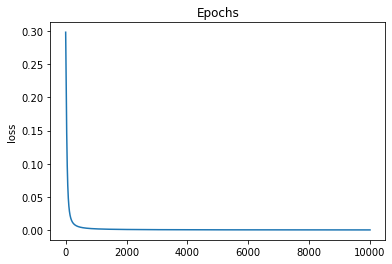

In [157]:
Y = list(range(epochs))
plt.plot(Y,loss)
plt.ylabel('loss')
plt.title('Epochs')